In [5]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Demos/CarPrice_Assignment.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
car_price = pd.read_csv(file_content_stream)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_price.shape

(205, 26)

In [7]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Leave one out cross validation

In [12]:
## Defining the input and target variables
X1 = car_price[['wheelbase', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
X2 = car_price[['carwidth', 'carheight', 'horsepower', 'citympg', 'highwaympg']]
Y = car_price['price']

In [16]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

## Defining lists to store results
md1_preds = list()
md2_preds = list()

cv = LeaveOneOut()

for train_ix, test_ix in cv.split(X1):
    
    ## Splitting the data 
    X1_train, X1_val = X1.loc[train_ix], X1.loc[test_ix]
    X2_train, X2_val = X2.loc[train_ix], X2.loc[test_ix]
    
    Y_train, Y_test = Y.loc[train_ix], Y.loc[test_ix]
    
    ## Building the models
    md1 = LinearRegression().fit(X1_train, Y_train)
    md2 = LinearRegression().fit(X2_train, Y_train)
    
    ## Predicting on test
    pred1 = md1.predict(X1_val)
    pred2 = md2.predict(X2_val)
    
    ## Storing the results
    md1_preds.append(pred1[0])
    md2_preds.append(pred2[0])

In [17]:
## Comparing the mse
mse1 = np.mean(np.power(md1_preds - Y, 2))
mse2 = np.mean(np.power(md2_preds - Y, 2))

In [18]:
mse1

16991640.81249029

In [19]:
mse2

16909146.063915726

In [2]:
from sklearn.model_selection import train_test_split

## Removing NAs
housing = housing.dropna()

## Defining input and target variable
X = housing.drop(columns = ['median_house_value', 'ocean_proximity'], axis = 1)
Y = housing['median_house_value']

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
from sklearn.linear_model import LinearRegression

## Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds = lm_md.predict(X_test)

## Computing the mse
mse = np.mean(np.power(preds - Y_test, 2))
mse

5336075043.622632

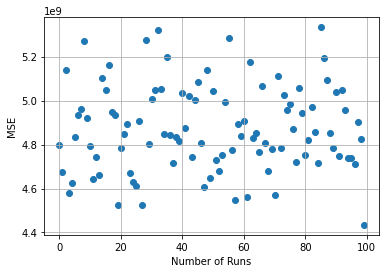

In [4]:
mse_results = []

for i in range(0, 100):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## Building the linear model
    lm_md = LinearRegression().fit(X_train, Y_train)

    ## Predicting on test
    preds = lm_md.predict(X_test)

    ## Computing the mse
    mse_results.append(np.mean(np.power(preds - Y_test, 2)))   
    
## Plotting mse results
runs = range(0, 100)
plt.scatter(runs, mse_results)
plt.xlabel('Number of Runs')
plt.ylabel('MSE')
plt.grid()
plt.show()